<a href="https://colab.research.google.com/github/MidoriTinto/Python_For_Data_Analysis/blob/main/Projects/NBA_Most_Valuable_Players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What makes an MVP winner : looking at correlations between the proportion of votes, number of games played and points per game.
---

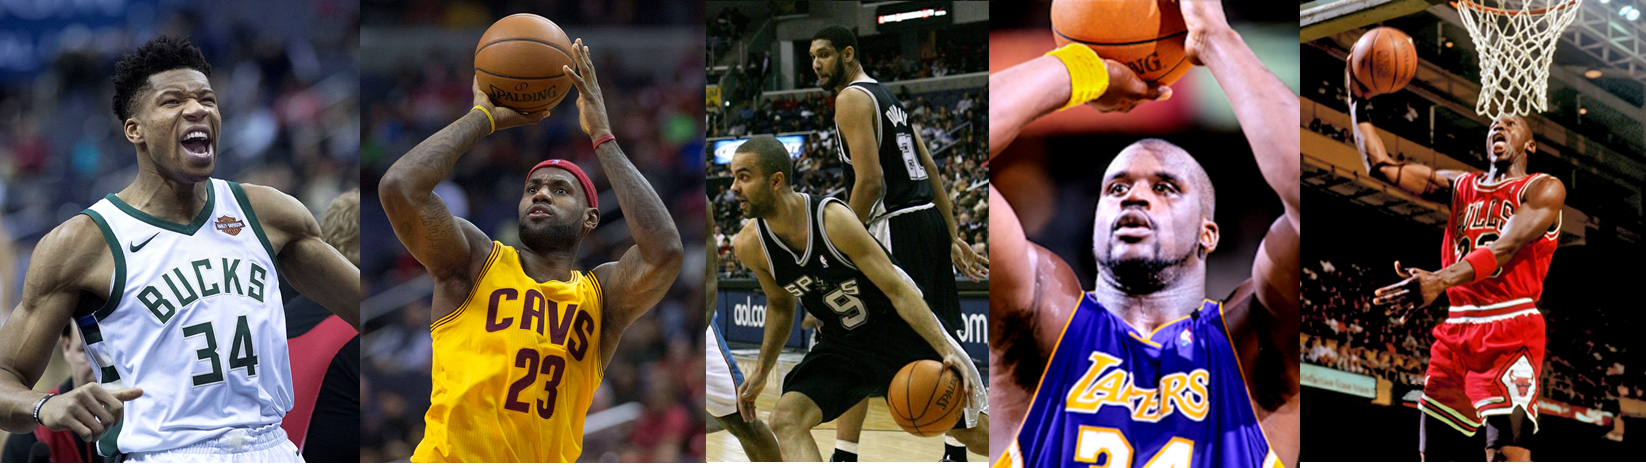

Using information published on The National Basketball Association about their end of season awards on their website (https://www.basketball-reference.com/awards/awards_2021.html) we will retrieved information such as basic stats, previous most valuable players(mvp), correlations. Furthermore, we might use these tables to help predict NBA's MVP for 2022. We would start this process by scraping the data from their website (see below on how to do this for reference).

## For reference:
---


This is the code provided by Karen Scott and Lila from Futurecoders that was originally used to scrape the tables from the NBA website, using Colabs, and saving them in .csv files, downloaded to the local device.   Note:  Google seems to have a limit on the number of files it can deal with for download at once. This may need to be run in three lots (1991 to 2000, 2001 to 2010, 2011 t0 2020, 2021)
```
import requests
from bs4 import BeautifulSoup
import pandas as pd
from google.colab import files

def get_data():
  years = list(range(1991, 2021))
  url = "https://www.basketball-reference.com/awards/awards_{}.html"
  for year in years:
    year_url = url.format(year)
    data = requests.get(year_url)
    soup = BeautifulSoup(data.text, "html.parser")
    soup.find('tr', class_="over_header").decompose()
    mvp_table = soup.find(id="mvp")
    mvp_year = pd.read_html(str(mvp_table))[0]
    filename = "mvp_{}.csv"
    mvp_year.to_csv(filename.format(year))
    files.download(filename.format(year))
  return mvp_year

table_data = get_data()
```





**GLOSSARY:**
---
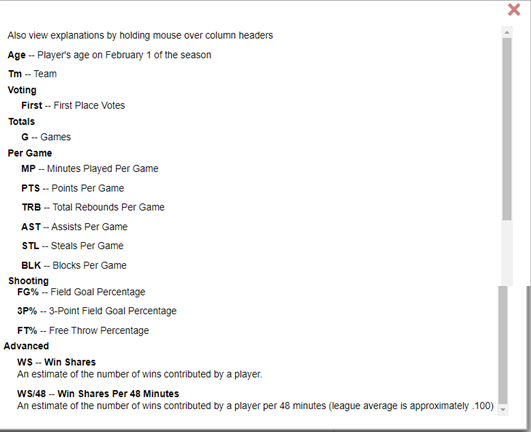

##Data sources:
---



* https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/NBA-MVP/mvp_1991.csv
*   Links to individual files are in this format:  https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/NBA-MVP/mvp_1991.csv with the year replaced for each file.

 

## The JOB
---



*   Read the datasets (there are 11 dataset files - 1991 to 2021)

*   Investigate the contents of the resulting dataframes.
*   Can they be sensibly merged?  What do you observe?


*  Does sorting reveal any trends? 

*   Is there a trend in performance?


# 1. Downloading and merging dataframes
---
There are in total three sets of data (1991 to 2000, 2001 to 2010, 2011 t0 2020) that would need merging to make one single dataframe.

Best way to this is to use a loop that helps go through each single row, concatenates information but also creates a new column in which the year for every single row is added. 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


#range of years need to later populate column Year - otherwise no way to know what record belongs to what year
years = list(range(1992, 2021)) 

#create nba_full which will later hold all records in one dataframe (from 1991 - 2000)
#nba_full starts by reading the first csv file from 1991
nba_full=pd.read_csv("https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/NBA-MVP/mvp_1991.csv")

#add a column to this data set called Year and fill every row of these series with the year 1991
nba_full["Year"]=pd.Series([1991 for x in range(len(nba_full.index))])

#nba_full now displays a 1991 dataset with an added column called Year containing 1991
display(nba_full)
 
 #a loop is needed so everytime a dataset for the next year is goes through it, a column called Year and  the respective year in that series/column is added
for year in years:
  #read the file PLUS add Year as a string PLUS .csv
    url="https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/NBA-MVP/mvp_"+ str(year) +".csv"
    #create a temporary dataframe that contains the URL
    nba_temp=pd.read_csv(url)
    #add the column Year and add the year of the csv file to the column
    nba_temp["Year"]= pd.Series([year for x in range(len(nba_temp.index))])
    #now, concatenate nba_temp to nba_full (created before the loop and containing previous year)
    nba_full= pd.concat([nba_full,nba_temp], ignore_index=True)
    #display (nba_full.head(30))
nba_full





Unnamed: 0 Rank             Player  Age   Tm  First  Pts Won  Pts Max  \
0            0    1     Michael Jordan   27  CHI   77.0    891.0      960   
1            1    2      Magic Johnson   31  LAL   10.0    497.0      960   
2            2    3     David Robinson   25  SAS    6.0    476.0      960   
3            3    4    Charles Barkley   27  PHI    2.0    222.0      960   
4            4    5        Karl Malone   27  UTA    0.0    142.0      960   
5            5    6      Clyde Drexler   28  POR    1.0     75.0      960   
6            6    7      Kevin Johnson   24  PHO    0.0     32.0      960   
7            7    8  Dominique Wilkins   31  ATL    0.0     29.0      960   
8            8   9T         Larry Bird   34  BOS    0.0     25.0      960   
9            9   9T       Terry Porter   27  POR    0.0     25.0      960   
10          10   11      Patrick Ewing   28  NYK    0.0     20.0      960   
11          11   12      John Stockton   28  UTA    0.0     15.0      960   
12          12   13       Isiah Thomas   29  DET    0.0     11.0      960   
13          13   14      Robert Parish   37  BOS    0.0     10.0      960   
14          14   15         Joe Dumars   27  DET    0.0      8.0      960   
15          15   16       Bernard King   34  WSB    0.0      7.0      960   
16          16   17        Kenny Smith   25  HOU    0.0      5.0      960   
17          17   18    Hakeem Olajuwon   28  HOU    0.0      4.0      960   
18          18  19T       Tim Hardaway   24  GSW    0.0      1.0      960   
19          19  19T       Kevin McHale   33  BOS    0.0      1.0      960   

    Share   G  ...   TRB   AST  STL  BLK    FG%    3P%    FT%    WS  WS/48  \
0   0.928  82  ...   6.0   5.5  2.7  1.0  0.539  0.312  0.851  20.3  0.321   
1   0.518  79  ...   7.0  12.5  1.3  0.2  0.477  0.320  0.906  15.4  0.251   
2   0.496  82  ...  13.0   2.5  1.5  3.9  0.552  0.143  0.762  17.0  0.264   
3   0.231  67  ...  10.1   4.2  1.6  0.5  0.570  0.284  0.722  13.4  0.258   
4   0.148  82  ...  11.8   3.3  1.1  1.0  0.527  0.286  0.770  15.5  0.225   
5   0.078  82  ...   6.7   6.0  1.8  0.7  0.482  0.319  0.794  12.4  0.209   
6   0.033  77  ...   3.5  10.1  2.1  0.1  0.516  0.205  0.843  12.7  0.220   
7   0.030  81  ...   9.0   3.3  1.5  0.8  0.470  0.341  0.829  11.4  0.177   
8   0.026  60  ...   8.5   7.2  1.8  1.0  0.454  0.389  0.891   6.6  0.140   
9   0.026  81  ...   3.5   8.0  2.0  0.1  0.515  0.415  0.823  13.0  0.235   
10  0.021  81  ...  11.2   3.0  1.0  3.2  0.514  0.000  0.745  10.0  0.155   
11  0.016  82  ...   2.9  14.2  2.9  0.2  0.507  0.345  0.836  14.0  0.217   
12  0.011  48  ...   3.3   9.3  1.6  0.2  0.435  0.292  0.782   3.4  0.098   
13  0.010  81  ...  10.6   0.8  0.8  1.3  0.598  0.000  0.767  10.0  0.198   
14  0.008  80  ...   2.3   5.5  1.1  0.1  0.481  0.311  0.890   9.9  0.155   
15  0.007  64  ...   5.0   4.6  0.9  0.3  0.472  0.216  0.790   3.5  0.070   
16  0.005  78  ...   2.1   7.1  1.4  0.1  0.520  0.363  0.844   9.0  0.161   
17  0.004  56  ...  13.8   2.3  2.2  3.9  0.508  0.000  0.769   8.6  0.201   
18  0.001  82  ...   4.0   9.7  2.6  0.1  0.476  0.385  0.803   9.9  0.148   
19  0.001  68  ...   7.1   1.9  0.4  2.1  0.553  0.405  0.829   7.9  0.182   

    Year  
0   1991  
1   1991  
2   1991  
3   1991  
4   1991  
5   1991  
6   1991  
7   1991  
8   1991  
9   1991  
10  1991  
11  1991  
12  1991  
13  1991  
14  1991  
15  1991  
16  1991  
17  1991  
18  1991  
19  1991  

[20 rows x 22 columns]

Unnamed: 0 Rank           Player  Age   Tm  First  Pts Won  Pts Max  \
0             0    1   Michael Jordan   27  CHI   77.0    891.0      960   
1             1    2    Magic Johnson   31  LAL   10.0    497.0      960   
2             2    3   David Robinson   25  SAS    6.0    476.0      960   
3             3    4  Charles Barkley   27  PHI    2.0    222.0      960   
4             4    5      Karl Malone   27  UTA    0.0    142.0      960   
..          ...  ...              ...  ...  ...    ...      ...      ...   
454           7    8   Damian Lillard   29  POR    0.0     23.0     1010   
455           8    9     Nikola Jokić   24  DEN    0.0     18.0     1010   
456           9   10    Pascal Siakam   25  TOR    0.0     17.0     1010   
457          10   11     Jimmy Butler   30  MIA    0.0      9.0     1010   
458          11   12     Jayson Tatum   21  BOS    0.0      1.0     1010   

     Share   G  ...   TRB   AST  STL  BLK    FG%    3P%    FT%    WS  WS/48  \
0    0.928  82  ...   6.0   5.5  2.7  1.0  0.539  0.312  0.851  20.3  0.321   
1    0.518  79  ...   7.0  12.5  1.3  0.2  0.477  0.320  0.906  15.4  0.251   
2    0.496  82  ...  13.0   2.5  1.5  3.9  0.552  0.143  0.762  17.0  0.264   
3    0.231  67  ...  10.1   4.2  1.6  0.5  0.570  0.284  0.722  13.4  0.258   
4    0.148  82  ...  11.8   3.3  1.1  1.0  0.527  0.286  0.770  15.5  0.225   
..     ...  ..  ...   ...   ...  ...  ...    ...    ...    ...   ...    ...   
454  0.023  66  ...   4.3   8.0  1.1  0.3  0.463  0.401  0.888  11.6  0.225   
455  0.018  73  ...   9.7   7.0  1.2  0.6  0.528  0.314  0.817   9.8  0.202   
456  0.017  60  ...   7.3   3.5  1.0  0.9  0.453  0.359  0.792   5.4  0.123   
457  0.009  58  ...   6.7   6.0  1.8  0.6  0.455  0.244  0.834   9.0  0.221   
458  0.001  66  ...   7.0   3.0  1.4  0.9  0.450  0.403  0.812   6.9  0.146   

     Year  
0    1991  
1    1991  
2    1991  
3    1991  
4    1991  
..    ...  
454  2020  
455  2020  
456  2020  
457  2020  
458  2020  

[459 rows x 22 columns]

*By using a loop all three datasets have being merged while a new column was created holding the year for each row. Without creating the latter it would be impossible to know what year information comes from. The dataframe is called 'nba_full'.*

#2. Investigating 'nba_full'
---
Here, we will be looking at the shape of the dataframe and proceed with cleaning where necessary.

In [2]:
nba_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  459 non-null    int64  
 1   Rank        459 non-null    object 
 2   Player      459 non-null    object 
 3   Age         459 non-null    int64  
 4   Tm          459 non-null    object 
 5   First       459 non-null    float64
 6   Pts Won     459 non-null    float64
 7   Pts Max     459 non-null    int64  
 8   Share       459 non-null    float64
 9   G           459 non-null    int64  
 10  MP          459 non-null    float64
 11  PTS         459 non-null    float64
 12  TRB         459 non-null    float64
 13  AST         459 non-null    float64
 14  STL         459 non-null    float64
 15  BLK         459 non-null    float64
 16  FG%         459 non-null    float64
 17  3P%         448 non-null    float64
 18  FT%         459 non-null    float64
 19  WS          459 non-null    f

The NBA_full dataframe contains 459 entries and 22 columns. column '3P%' has null values.

In [3]:
nba_full.columns

Index(['Unnamed: 0', 'Rank', 'Player', 'Age', 'Tm', 'First', 'Pts Won',
       'Pts Max', 'Share', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%',
       '3P%', 'FT%', 'WS', 'WS/48', 'Year'],
      dtype='object')

In [4]:
nba_full.describe()

Unnamed: 0         Age       First      Pts Won      Pts Max  \
count  459.000000  459.000000  459.000000   459.000000   459.000000   
mean     7.418301   27.692810    7.570806   196.793028  1157.995643   
std      4.849185    3.846874   22.880001   317.107311   110.296900   
min      0.000000   19.000000    0.000000     1.000000   960.000000   
25%      3.000000   25.000000    0.000000     4.000000  1010.000000   
50%      7.000000   28.000000    0.000000    26.000000  1210.000000   
75%     11.000000   30.000000    1.000000   258.500000  1250.000000   
max     20.000000   38.000000  131.000000  1310.000000  1310.000000   

            Share           G          MP         PTS         TRB        AST  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.00000   
mean     0.169917   73.372549   36.502614   22.261002    7.481917    5.16122   
std      0.271989   10.350969    2.999628    5.111053    3.289111    2.70774   
min      0.001000   17.000000   27.000000    4.700000    1.900000    0.80000   
25%      0.003000   69.000000   34.700000   19.200000    4.700000    3.00000   
50%      0.025000   77.000000   36.800000   22.400000    6.900000    4.70000   
75%      0.229500   81.000000   38.500000   26.000000   10.200000    6.90000   
max      1.000000   82.000000   43.700000   36.100000   18.700000   14.20000   

              STL         BLK         FG%         3P%         FT%          WS  \
count  459.000000  459.000000  459.000000  448.000000  459.000000  459.000000   
mean     1.409368    0.978867    0.486115    0.299317    0.780745   10.959695   
std      0.544343    0.915472    0.044652    0.127166    0.094913    3.341679   
min      0.200000    0.000000    0.384000    0.000000    0.422000    2.300000   
25%      1.000000    0.300000    0.454500    0.269500    0.738000    8.800000   
50%      1.400000    0.600000    0.483000    0.333000    0.795000   10.800000   
75%      1.800000    1.400000    0.512000    0.376250    0.847000   13.000000   
max      3.000000    4.500000    0.669000    1.000000    0.948000   20.400000   

            WS/48         Year  
count  459.000000   459.000000  
mean     0.195460  2004.433551  
std      0.046943     8.502597  
min      0.065000  1991.000000  
25%      0.166000  1997.000000  
50%      0.194000  2004.000000  
75%      0.224000  2012.000000  
max      0.322000  2020.000000

*The dataframe 'nba_full' consists of 459 rows and 22 columns. Column '3p%' corresponding to 3-point field goal percentage has null values (448 non-null).  Null values will be dropped later in the notebook.*

# 3. Who are the most valuable players in this data set
---

For a player to win an MVP award he would have to be awarded the highest point total. This happens as follow:
 

*   Each member of the voting panel casts a vote for first to fifth place selections
*   Each first-place vote is worth 10 points; each second-place vote is worth seven; each third-place vote is worth five, fourth-place is worth three and fifth-place is worth one.

Series 'First' contains information on first place votes.Thus, the players with the most first  place votes are usually the winners.




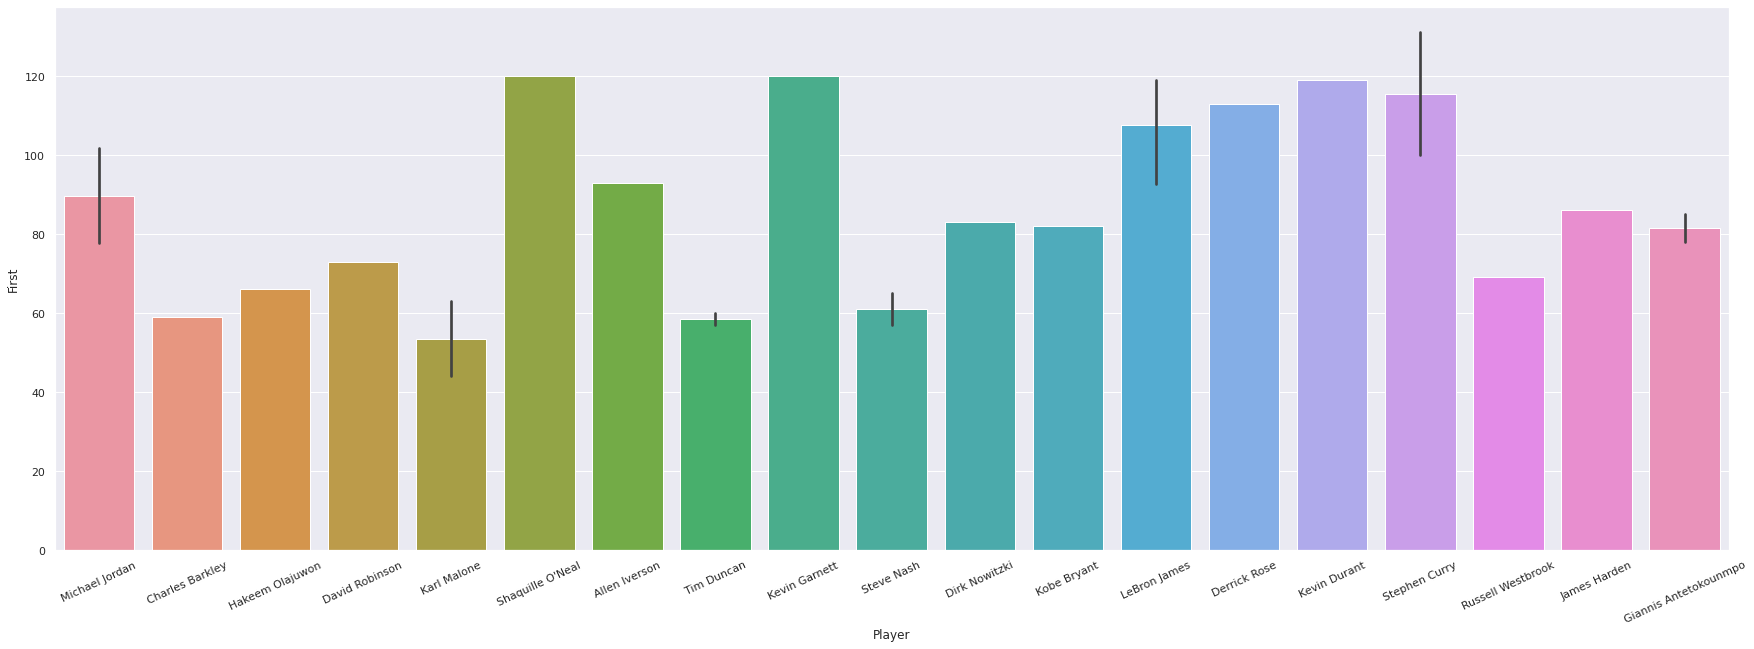

In [5]:
def get_mvp():
  
  #display the most valuable players across the years
  nba_mvp=nba_full.groupby('Year').apply (lambda x: x.sort_values('First', ascending=False).head(1))
  #print(nba_mvp.head(10))


  sns.set_theme(style="whitegrid")
  sns.set(rc={"figure.figsize":(30, 10)})
  ax = sns.barplot(x="Player", y="First", data=nba_mvp)
  plt.xticks(rotation=25)

get_mvp()

*Figure above shows the name of all players between 1991 and 2020 who have had the highest numbers of first votes in a given year, have ranked in position 1 and been awarded the MVP award.*

### 4. Correlations between Voting and Game Performance
---
In a data set that contains some information about players performance  as well as awarded votes  the question of possible correlation between them arises. Different Series in these dataframe points at players with an MVP Award (e.g 'Points Won', 'First' and 'Share') (https://www.basketball-reference.com/awards/awards_2021.html#all_mvp). For instance, 'Share' represents the proportion of points won ('Points Won') over the maximum number of points a player can win ('Pts Max'). As seen above, the higher the value in 'Share' the higher the probability that that player was awarded an MVP Award that year. Therefore, we will not be interesting in looking at the correlation between those series which are predicted to be high (e.g 'Shares'and 'Pts Won' but at any correlation between voting and game(i.e 'Share' in correlation to game 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK') and shooting ('FG%','3P%', 'FT%' ) performance if possible. As seen during the investigation of the dataframe, and since'3P%' will be taken into consideration, null values within that series will be dropped.  

### ***Creating a copy of the dataframe nba_full***

In [6]:
nba_full_copy=nba_full.copy()
nba_full_copy

Unnamed: 0 Rank           Player  Age   Tm  First  Pts Won  Pts Max  \
0             0    1   Michael Jordan   27  CHI   77.0    891.0      960   
1             1    2    Magic Johnson   31  LAL   10.0    497.0      960   
2             2    3   David Robinson   25  SAS    6.0    476.0      960   
3             3    4  Charles Barkley   27  PHI    2.0    222.0      960   
4             4    5      Karl Malone   27  UTA    0.0    142.0      960   
..          ...  ...              ...  ...  ...    ...      ...      ...   
454           7    8   Damian Lillard   29  POR    0.0     23.0     1010   
455           8    9     Nikola Jokić   24  DEN    0.0     18.0     1010   
456           9   10    Pascal Siakam   25  TOR    0.0     17.0     1010   
457          10   11     Jimmy Butler   30  MIA    0.0      9.0     1010   
458          11   12     Jayson Tatum   21  BOS    0.0      1.0     1010   

     Share   G  ...   TRB   AST  STL  BLK    FG%    3P%    FT%    WS  WS/48  \
0    0.928  82  ...   6.0   5.5  2.7  1.0  0.539  0.312  0.851  20.3  0.321   
1    0.518  79  ...   7.0  12.5  1.3  0.2  0.477  0.320  0.906  15.4  0.251   
2    0.496  82  ...  13.0   2.5  1.5  3.9  0.552  0.143  0.762  17.0  0.264   
3    0.231  67  ...  10.1   4.2  1.6  0.5  0.570  0.284  0.722  13.4  0.258   
4    0.148  82  ...  11.8   3.3  1.1  1.0  0.527  0.286  0.770  15.5  0.225   
..     ...  ..  ...   ...   ...  ...  ...    ...    ...    ...   ...    ...   
454  0.023  66  ...   4.3   8.0  1.1  0.3  0.463  0.401  0.888  11.6  0.225   
455  0.018  73  ...   9.7   7.0  1.2  0.6  0.528  0.314  0.817   9.8  0.202   
456  0.017  60  ...   7.3   3.5  1.0  0.9  0.453  0.359  0.792   5.4  0.123   
457  0.009  58  ...   6.7   6.0  1.8  0.6  0.455  0.244  0.834   9.0  0.221   
458  0.001  66  ...   7.0   3.0  1.4  0.9  0.450  0.403  0.812   6.9  0.146   

     Year  
0    1991  
1    1991  
2    1991  
3    1991  
4    1991  
..    ...  
454  2020  
455  2020  
456  2020  
457  2020  
458  2020  

[459 rows x 22 columns]

### ***Dropping null values in '3P%'*** 

In [7]:
nba_full_clean=nba_full_copy.dropna(subset=['3P%'])
nba_full_clean

Unnamed: 0 Rank           Player  Age   Tm  First  Pts Won  Pts Max  \
0             0    1   Michael Jordan   27  CHI   77.0    891.0      960   
1             1    2    Magic Johnson   31  LAL   10.0    497.0      960   
2             2    3   David Robinson   25  SAS    6.0    476.0      960   
3             3    4  Charles Barkley   27  PHI    2.0    222.0      960   
4             4    5      Karl Malone   27  UTA    0.0    142.0      960   
..          ...  ...              ...  ...  ...    ...      ...      ...   
454           7    8   Damian Lillard   29  POR    0.0     23.0     1010   
455           8    9     Nikola Jokić   24  DEN    0.0     18.0     1010   
456           9   10    Pascal Siakam   25  TOR    0.0     17.0     1010   
457          10   11     Jimmy Butler   30  MIA    0.0      9.0     1010   
458          11   12     Jayson Tatum   21  BOS    0.0      1.0     1010   

     Share   G  ...   TRB   AST  STL  BLK    FG%    3P%    FT%    WS  WS/48  \
0    0.928  82  ...   6.0   5.5  2.7  1.0  0.539  0.312  0.851  20.3  0.321   
1    0.518  79  ...   7.0  12.5  1.3  0.2  0.477  0.320  0.906  15.4  0.251   
2    0.496  82  ...  13.0   2.5  1.5  3.9  0.552  0.143  0.762  17.0  0.264   
3    0.231  67  ...  10.1   4.2  1.6  0.5  0.570  0.284  0.722  13.4  0.258   
4    0.148  82  ...  11.8   3.3  1.1  1.0  0.527  0.286  0.770  15.5  0.225   
..     ...  ..  ...   ...   ...  ...  ...    ...    ...    ...   ...    ...   
454  0.023  66  ...   4.3   8.0  1.1  0.3  0.463  0.401  0.888  11.6  0.225   
455  0.018  73  ...   9.7   7.0  1.2  0.6  0.528  0.314  0.817   9.8  0.202   
456  0.017  60  ...   7.3   3.5  1.0  0.9  0.453  0.359  0.792   5.4  0.123   
457  0.009  58  ...   6.7   6.0  1.8  0.6  0.455  0.244  0.834   9.0  0.221   
458  0.001  66  ...   7.0   3.0  1.4  0.9  0.450  0.403  0.812   6.9  0.146   

     Year  
0    1991  
1    1991  
2    1991  
3    1991  
4    1991  
..    ...  
454  2020  
455  2020  
456  2020  
457  2020  
458  2020  

[448 rows x 22 columns]

### ***Correlation matrix using heatmap.*** *Any values closer to 1 or -1 indicates a strong positive or strong negative correlation repectively.*

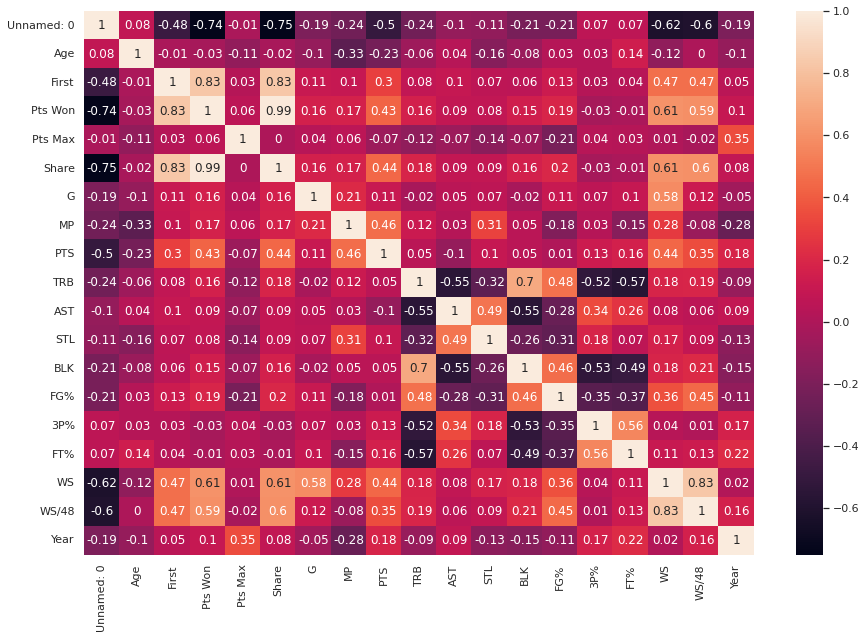

In [8]:
plt.subplots(figsize=(15,10))
correlation_matrix=nba_full_clean.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

*As expected, 'Share' strongly correlates with series 'Pts Won','First',and 'WS'(estimate of the number of wins contributed by a player) and 'WS/48' (estimate of the number of wins contributed by a player per 48 minutes. In the series defining game performance a positive  correlation between 'Share' and 'PTS'(points per game, 0.44) was found. Lower correlation is seen between 'Share' and 'G'(number of games played, 0.16), 'MP'(minutes played, 0.17), TRB (Total Rebounds per Game, 0.18) and BLK (blocks per game, 0.16). Below, the relationship between Share and both PTS and G will be analysed more closely.*

### 5. The relationship between the proportion of votes won ('Share), and points per game ('PTS') 
---
As seen above, it seems that the higher the proportion of points won during voting by a player ['Share'] the more points per game they had made. Thus, we will now have a closer look at the distribution of series 'PTS' before looking at the correlation of these values with a linear regression.



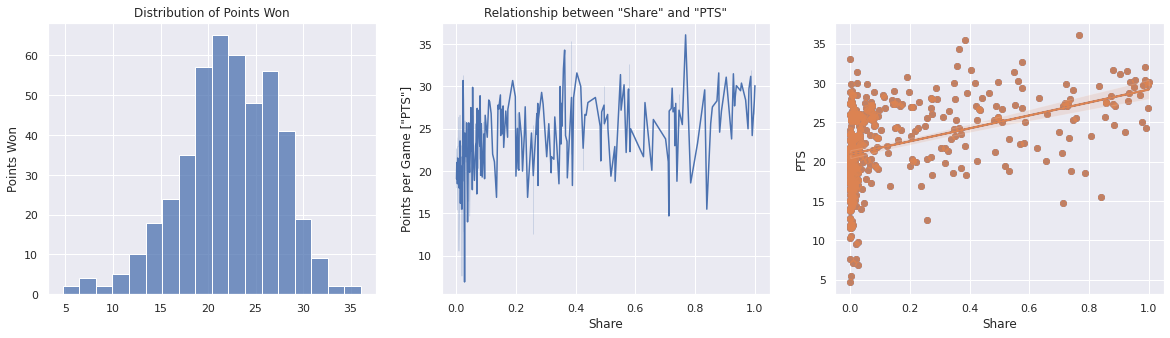

LinregressResult(slope=8.229217411264365, intercept=20.924918308696945, rvalue=0.44130561819064934, pvalue=8.929869438196855e-23, stderr=0.7923495987777626)


In [9]:
def get_relationships(column1, column2):
 
 #Creating variable 'pts' to find out if the data is normally distributed (see plot 1 further below)
 pts=nba_full[column2]
 
 #PLOTS
 fig, (plot1, plot2, plot3) = plt.subplots(1, 3)
 fig.set_figwidth(20)
 fig.set_figheight(5)
 #histogram to check the distribution of values in column 'Pts Won'
 plot1 = sns.histplot(data=pts, ax=plot1)
 plot1.set_title('Distribution of Points Won') 
 plot1.set_xlabel('')
 plot1.set_ylabel('Points Won')
 #line plot between votes won and points won
 plot2 = sns.lineplot(x=nba_full_clean[column1], y=nba_full_clean[column2], ax=plot2)
 plot2.set_title('Relationship between "Share" and "PTS"') 
 plot2.set_xlabel('Share')
 plot2.set_ylabel('Points per Game ["PTS"]')
 #scatterplot to look for correlation between votes won and share
 x=nba_full_clean[column1]
 y=nba_full_clean[column2]
 plt.scatter(x,y)#FIRST SCATTER PLOT THE DATA
 regression = linregress(x,y)#THEN ASSIGN RESULT OF REGRESSION TO THE PLOT
 slope = regression.slope
 intercept = regression.intercept
 plt.plot(x, slope*x + intercept)#PLOT LINE REGRESSION
 plot3=sns.regplot(x=x, y=y)
 plot3.set_xlabel('Share')
 plot3.set_ylabel('PTS')
 plt.show()

 print(regression)

get_relationships("Share", "PTS")

*The 'PTS' data appeared mostly normaly distributed with some outliers. A linear relationship between 'Share' and 'PTS' is seen. Because of this, 'PTS' might be good candidate for further predictions when using the current data set as it is.*

### 6. The relationship between proportion of votes won ('Share') and games played ('G')
---


  Historically, an MVP Award is given to the one player who has played the best over a regular season each and every year and as such has brought the most value to the team. This includes having played the most games in a year. Currently this number is 70 (games). Therefore, it was surprising to see that, although significant, a low correlation between 'Share' and 'G' was found (0.16). Therefore, a further look into the data might shed light into this. 

     Share     G
0    0.001  77.0
1    0.002  76.0
2    0.003  75.5
3    0.004  68.5
4    0.005  70.5
..     ...   ...
199  0.980  76.0
200  0.986  81.5
201  0.991  82.0
202  0.998  77.5
203  1.000  79.0

[204 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Share   204 non-null    float64
 1   G       204 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB
None


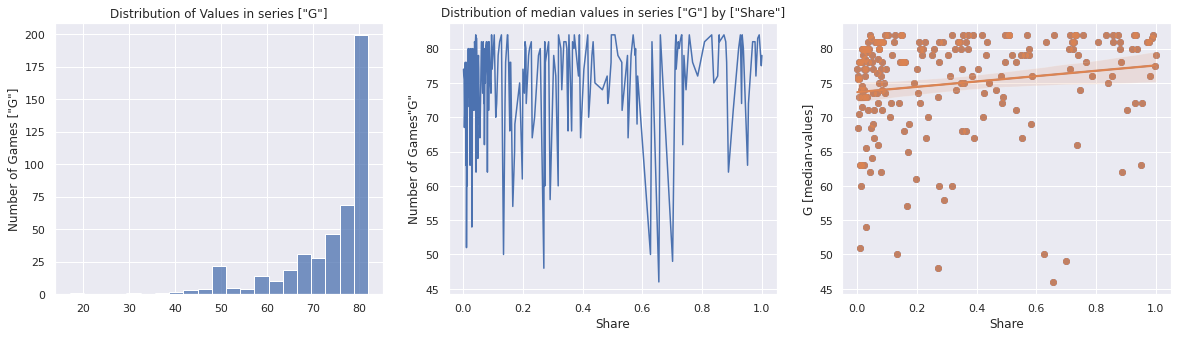

LinregressResult(slope=3.897135510879789, intercept=73.64812593856477, rvalue=0.16062852435415337, pvalue=0.021729701377978326, stderr=1.6848873750877278)


In [10]:
def get_relationships(column1, column2):

#Creating variable 'game' to find out if the data in "G" is normally distributed (see plot 1 further below)
 game=nba_full[column2]
 
 
 #Because data above showed to be NOT normally distributed the median values of 'G' are calculated here
 game_share=nba_full_clean.groupby([column1])[column2].agg('median').reset_index()
 print(game_share)
 #saving results into a new dataframe 'median_points' which contains two columns: 'Share' and median values of 'GAme'
 median_points=pd. DataFrame(game_share)
 print(median_points.info())


 #PLOTS 
 fig, (plot1, plot2, plot3) = plt.subplots(1, 3)
 fig.set_figwidth(20)
 fig.set_figheight(5)
 #histogram to check the distribution of values in column 'Game'
 plot1 = sns.histplot(data=game, ax=plot1)
 plot1.set_title('Distribution of Values in series ["G"]') 
 plot1.set_xlabel('')
 plot1.set_ylabel('Number of Games ["G"]')
 #line plot using values of game ('G)
 plot2 = sns.lineplot(x=median_points[column1], y=median_points[column2], ax=plot2)
 plot2.set_title('Distribution of median values in series ["G"] by ["Share"]') 
 plot2.set_xlabel('Share')
 plot2.set_ylabel('Number of Games"G"')
 #scatterplot to look for correlation between votes won and game's played
 x=median_points[column1]
 y=median_points[column2]
 plt.scatter(x,y)
 regression = linregress(x,y)
 slope = regression.slope
 intercept = regression.intercept
 plt.plot(x, slope*x + intercept)
 plot3=sns.regplot(x=x, y=y)
 plot3.set_xlabel('Share')
 plot3.set_ylabel('G [median-values]')
 plt.show()

 print(regression)

get_relationships("Share", "G")

*Series 'G' is not normally distributed as seen in histogram on the left. Hence, median values of the number of games played ('G') were used to plot against 'Share' - as to avoid outliers affecting the results. The relationship between the number of games played and the proportion of votes has a linear tendency which appears to be significant ( p< 0.05 ). Despite these results it is clear that while most players with high 'Share' values also have played lots of games, there might be others who might have won the award without playing that many games (70) or may have over 70 games played but have not won an award yet.* 

###7. Players who have played in numerous games but whose 'Share' values are low
---

   Unnamed: 0 Rank          Player  Age   Tm  First  Pts Won  Pts Max  Share  \
0           0    1  Michael Jordan   27  CHI   77.0    891.0      960  0.928   
1           1    2   Magic Johnson   31  LAL   10.0    497.0      960  0.518   
2           2    3  David Robinson   25  SAS    6.0    476.0      960  0.496   
4           4    5     Karl Malone   27  UTA    0.0    142.0      960  0.148   
5           5    6   Clyde Drexler   28  POR    1.0     75.0      960  0.078   

    G  ...   TRB   AST  STL  BLK    FG%    3P%    FT%    WS  WS/48  Year  
0  82  ...   6.0   5.5  2.7  1.0  0.539  0.312  0.851  20.3  0.321  1991  
1  79  ...   7.0  12.5  1.3  0.2  0.477  0.320  0.906  15.4  0.251  1991  
2  82  ...  13.0   2.5  1.5  3.9  0.552  0.143  0.762  17.0  0.264  1991  
4  82  ...  11.8   3.3  1.1  1.0  0.527  0.286  0.770  15.5  0.225  1991  
5  82  ...   6.7   6.0  1.8  0.7  0.482  0.319  0.794  12.4  0.209  1991  

[5 rows x 22 columns]


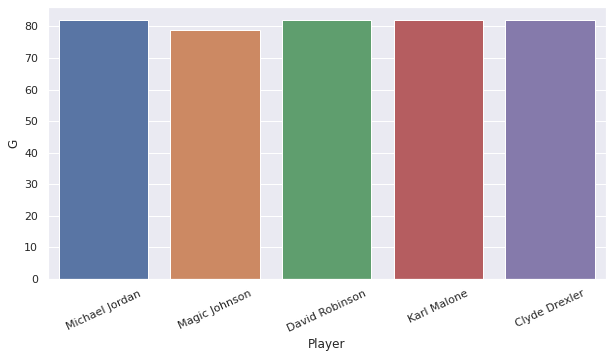

In [13]:
def get_mvp():
  

  #looking at those players who had played the most games
  most_games=nba_full_clean[nba_full_clean['G']>70].head()

  print(most_games)

  sns.set_theme(style="whitegrid")
  sns.set(rc={"figure.figsize":(10, 5)})
  ax = sns.barplot(x="Player", y="G", data=most_games)
  plt.xticks(rotation=25)

get_mvp()

*The results above tell us that although MVP Award winners do tend to have the highest 'G' value (i.e the highest numbers of games played like **Michael Jordan, 1991, 82 games, 0.928**) there are others who despite playing the same amount of games did not win an award (e.g **Karl Malone, 1991**, played **82 games** but had a 'Share' value of **0.148**). This might explain why the correlation between 'Share' and 'G' was relatively low compared to 'PTS' (points per game).*

## 8. Players who have been awarded an MVP Award with < 70  games 
---



Since we previously found that having played lots of games did not necessarily result in an MVP award, could a player still be awarded an MVP award despite having played fewer games in the season (e.g < 70)?
To find this out the table will be filtered for all those players who have played less than 70 games but have the highest value in series 'First' which usually means they have also ranked 1 (winner) in a year.

In [ ]:

def less_games():

  #filtering all those players who have played less than the usual amont of games expected for MVP winners
  less_games_played=nba_full_clean[nba_full_clean['G']<70]
  #return less_games_played
  
  winners_less_games=less_games_played.groupby('Year').apply (lambda x: x.sort_values('First', ascending=False).head(1))
  pd.set_option("display.max_rows", None)
  return winners_less_games

  #less_games=winners_less_games[winners_less_games['Rank']=='1']
  #return less_games


less_games()

Unnamed: 0 Rank                 Player  Age   Tm  First  Pts Won  \
Year                                                                         
1991 3             3    4        Charles Barkley   27  PHI    2.0    222.0   
1992 22            2    3         David Robinson   26  SAS    2.0    337.0   
1993 47           10  10T          Clyde Drexler   30  POR    0.0      1.0   
1994 60            9   10        Charles Barkley   30  PHO    0.0      5.0   
1995 73            5    6        Charles Barkley   31  PHO    1.0     96.0   
1996 92            9   9T       Shaquille O'Neal   23  ORL    0.0     63.0   
1997 109           9   9T       Shaquille O'Neal   24  LAL    0.0      7.0   
1998 129           9   10         Scottie Pippen   32  CHI    0.0     14.0   
1999 139           0    1            Karl Malone   35  UTA   44.0    827.0   
2000 170          10   11             Jason Kidd   26  PHO    0.0     25.0   
2001 184           8    9            Kobe Bryant   22  LAL    0.0     11.0   
2002 195           2    3       Shaquille O'Neal   29  LAL   15.0    696.0   
2003 220           9   10           Chris Webber   29  SAC    0.0     19.0   
2004 225           1    2             Tim Duncan   27  SAS    0.0    716.0   
2005 243           3    4             Tim Duncan   28  SAS    1.0    328.0   
2007 273           6    7             Chris Bosh   22  TOR    0.0     43.0   
2008 291           7    8          Tracy McGrady   28  HOU    0.0     19.0   
2010 318           5    6        Carmelo Anthony   25  DEN    0.0     65.0   
2011 338          10  10T            Rajon Rondo   24  BOS    0.0      5.0   
2012 341           0    1           LeBron James   27  MIA   85.0   1074.0   
2013 358           2    3        Carmelo Anthony   28  NYK    1.0    475.0   
2014 378           6    7             Chris Paul   28  LAC    0.0     45.0   
2015 391           2    3           LeBron James   30  CLE    5.0    552.0   
2017 420           9   9T           Kevin Durant   28  GSW    0.0      2.0   
2018 428           6    7           Kevin Durant   29  GSW    0.0     66.0   
2019 439           4    5          Stephen Curry   30  GSW    0.0    175.0   
2020 447           0    1  Giannis Antetokounmpo   25  MIL   85.0    962.0   

          Pts Max  Share   G  ...   TRB   AST  STL  BLK    FG%    3P%    FT%  \
Year                          ...                                              
1991 3        960  0.231  67  ...  10.1   4.2  1.6  0.5  0.570  0.284  0.722   
1992 22       960  0.351  68  ...  12.2   2.7  2.3  4.5  0.551  0.125  0.701   
1993 47       980  0.001  49  ...   6.3   5.7  1.9  0.8  0.429  0.233  0.839   
1994 60      1010  0.005  65  ...  11.2   4.6  1.6  0.6  0.495  0.270  0.704   
1995 73      1050  0.091  68  ...  11.1   4.1  1.6  0.7  0.486  0.338  0.748   
1996 92      1130  0.056  54  ...  11.0   2.9  0.6  2.1  0.573  0.500  0.487   
1997 109     1150  0.006  51  ...  12.5   3.1  0.9  2.9  0.557  0.000  0.484   
1998 129     1160  0.012  44  ...   5.2   5.8  1.8  1.0  0.447  0.318  0.777   
1999 139     1180  0.701  49  ...   9.4   4.1  1.3  0.6  0.493  0.000  0.788   
2000 170     1210  0.021  67  ...   7.2  10.1  2.0  0.4  0.409  0.337  0.829   
2001 184     1240  0.009  68  ...   5.9   5.0  1.7  0.6  0.464  0.305  0.853   
2002 195     1260  0.552  67  ...  10.7   3.0  0.6  2.0  0.579  0.000  0.555   
2003 220     1190  0.016  67  ...  10.5   5.4  1.6  1.3  0.461  0.238  0.607   
2004 225     1230  0.582  69  ...  12.4   3.1  0.9  2.7  0.501  0.167  0.599   
2005 243     1270  0.258  66  ...  11.1   2.7  0.7  2.6  0.496  0.333  0.670   
2007 273     1290  0.033  69  ...  10.7   2.5  0.6  1.3  0.496  0.343  0.785   
2008 291     1260  0.015  66  ...   5.1   5.9  1.0  0.5  0.419  0.292  0.684   
2010 318     1230  0.053  69  ...   6.6   3.2  1.3  0.4  0.458  0.316  0.830   
2011 338     1210  0.004  68  ...   4.4  11.2  2.3  0.2  0.475  0.233  0.568   
2012 341     1210  0.888  62  ...   7.9   6.2  1.9  0.8  0.531  0.3

*The table above show all players with less than 70 games played and who also appear first in series 'First' (first votes, the ones with the highest value when the panel votes) This does not necessarily mean that they are winners but that they are the ones who got the most first votes among those with less games. The data above shows that indeed there are players who, despite not having played more than 70 games, were MVP Award winners.*

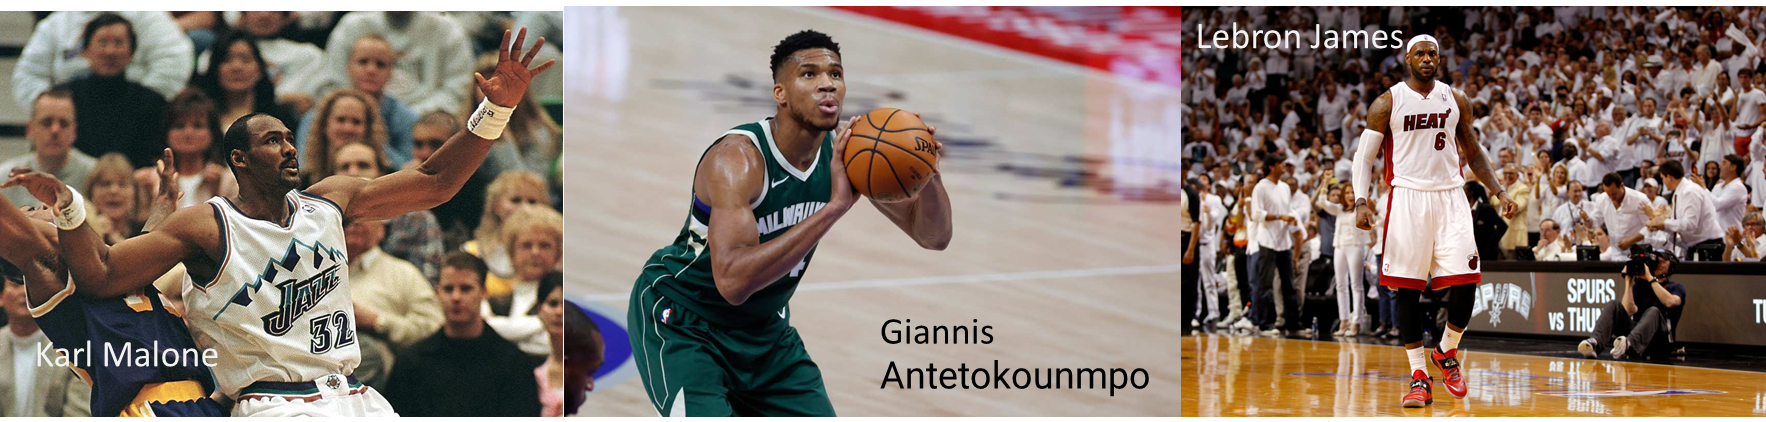

*These players are:
1999, **Karl Malone**, **49 games** (he is the only player in the history of the NBA to have been awarded an MVP Award with the lowest number of games played), 2012 **Lebron James**, **62 games**, and 2020 **Giannis Antetokounmpo**, **63 games**.*

##9.  The relationship between age ('Age') and the proportion of votes won ('Share')
---
Like in any other sport, players tend retired early due to injury or age. Thus, despite the correlation heatmap above showing little correlation between 'Age and 'Share', this was looked closer. 

    Age   Share
0    19  0.0050
1    20  0.0730
2    21  0.0295
3    22  0.0330
4    23  0.0265
5    24  0.0180
6    25  0.0200
7    26  0.0285
8    27  0.0695
9    28  0.0595
10   29  0.0270
11   30  0.0080
12   31  0.0250
13   32  0.0310
14   33  0.0125
15   34  0.0040
16   35  0.0060
17   36  0.0070
18   37  0.0135
19   38  0.0010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     20 non-null     int64  
 1   Share   20 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes
None


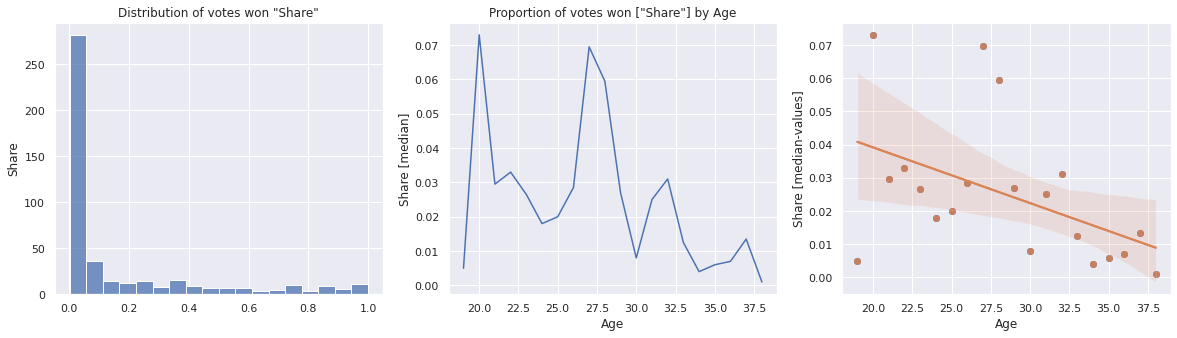

LinregressResult(slope=-0.0016770676691729332, intercept=0.07267142857142858, rvalue=-0.4728148668394421, pvalue=0.03526175083874529, stderr=0.0007366799793507227)


In [14]:

def get_relationship(column1, column2):

#Creating variable 'pts_won' to find out if the data is normally distributed (see plot 1 further below)
 share=nba_full[column2]
 
 
 #Because data above showed to be not normally distributed the median values of 'Pts Won' are calculated here
 share_age=nba_full.groupby([column1])[column2].agg('median').reset_index()
 print(share_age)
 #saving results into a new dataframe 'median_points' which contains two columns: 'Age' and median values of 'Pts Won'
 median_points=pd. DataFrame(share_age)
 print(median_points.info())


 #PLOTS
 fig, (plot1, plot2, plot3) = plt.subplots(1, 3)
 fig.set_figwidth(20)
 fig.set_figheight(5)
 #histogram to check the distribution of values in series 'Share'
 plot1 = sns.histplot(data=share, ax=plot1)
 plot1.set_title('Distribution of votes won "Share"') 
 plot1.set_xlabel('')
 plot1.set_ylabel('Share')
 #line plot using median values of votes Won
 plot2 = sns.lineplot(x=median_points[column1], y=median_points[column2], ax=plot2)
 plot2.set_title('Proportion of votes won ["Share"] by Age') 
 plot2.set_xlabel('Age')
 plot2.set_ylabel('Share [median]')
 #scatterplot to look for correlation between votes won and age
 x=median_points[column1]
 y=median_points[column2]
 plt.scatter(x,y)
 regression = linregress(x,y)
 slope = regression.slope
 intercept = regression.intercept
 plt.plot(x, slope*x + intercept)
 plot3=sns.regplot(x=x, y=y)
 plot3.set_xlabel('Age')
 plot3.set_ylabel('Share [median-values]')
 plt.show()

 print(regression)
 


get_relationship("Age", "Share")

*Series 'Share' corresponding to the proportion of votes won is not normally distributed which is why further analysis was done using its median values. By doing so, it was found a negative linear correlation between a player's age and the amount of votes won in a season indicating that the younger players tend to win more votes, maybe because they tend to be fitter and able to play lots of games than their older counterparts (p< 0.05) who may not be as fit.*

### CONCLUSION
---

By analysing this dataframe it was found that NBA MVP winners usually have scored the most *first time votes* and have played the more games in a season. However, there are exceptions to this such as Karl Malone in 1991 winner of an MVP award having played only 49 games as opposed to the 70 usually. It was noted that columns such as 'Pt Won', 'Share', 'WS', 'WS/48' are all expected to correlate with each other and are therefore not suitable for analysis on prediction models but would be rather used as indicators of an MVP winner. Therefore, future work may include more data on players' game performance to look at prediction models and machine learning.

## Reference
---
**Video link**: https://www.youtube.com/watch?v=JGQGd-oa0l4 used as an initial inspiration and modified to allow use of Google Colab and slower progress towards predictions (video uses Jupyter notebooks and local files so code is different)



1.   https://fadeawayworld.net/nba/nba-players-with-the-least-amount-of-games-played-to-win-the-mvp-award-karl-malone-won-the-1999-mvp-with-only-49-games
2.   https://bleacherreport.com/articles/758539-nba-lockout-for-dummies-explaining-the-situation-from-both-sides



# Reflection
----

## What skills have you demonstrated in completing this notebook?

Retrieval of dataframes, cleaning, wrangling, and analysis of data incl. linear regression

## What caused you the most difficulty?

As a basketball nonexpert there was a lot of terminology to learn,understand and keep in mind about MVP voting, players and game performance before doing any analysis. Once that was out of the way, the potential for going deeper into analysis and interpretation as well as machine learning makes it for a very interesting project.